### 데이터 분석 과정
1. 데이터 수집
   - 파일 데이터 수집, 웹 데이터 수집, API 데이터 수집
3. 데이터 전처리
   - 결측치(결측 데이터) 처리, 중복치(중복 데이터) 처리, 이상치(이상 데이터) 처리
5. 데이터 분석
6. 데이터 후처리
7. 데이터 모델링
8. 서비스 or 자동화

## 사용할 라이브러리

In [1]:
# 행렬을 처리하는 라이브러리
import pandas as pd
# 시각화 라이브러리, 새플 데이터(데이터셋=Dataset)도 제공
import seaborn as sns

In [2]:
# 데이터 불러오기
df = sns.load_dataset("tips")

# total_bill : 총 합계 요금
# tip : 팁 금액
# sex : 성별
# smoker : 흡연 여부
# day : 식당에 왔던 요일
# time : 식사 시간대(아침/점심/저녁)
# size : 식사 인원

In [3]:
# 행렬 데이터를 가지는 변수의 타입은 정보를 확인 가능
# 데이터 정보 확인
df.info()
### <info 함수를 통해 결측치 확인 가능>
# - 결측치가 있는지
# - 전체 행의 갯수와 각 컬럼의 non-null count의 값과 비교

### 데이터프레임이 관리하는 타입 : Dtype(데이터 타입) 이라고 칭한다.>
# 정수 : int
# 실수 : float
# 문자 : object
# 범주형 문자 : category
# 날짜 : datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
# Non-Null count 바뀌는 것 확인 가능
df["smoker"][1] = None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      243 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


C:\Users\Admin\AppData\Local\Temp\ipykernel_5888\512990887.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["smoker"][1] = None


In [5]:
# 성별과 팁 데이터만 조회하기
df[["sex", "tip"]]

,sex,tip
0,Female,1.01
1,Male,1.66
2,Male,3.50
3,Male,3.31
4,Female,3.61
...,...,...
239,Male,5.92
240,Female,2.00
241,Male,2.00
242,Male,1.75


In [6]:
# 2번 인덱스 위치의 행 삭제
droped_df = df.drop([2])
droped_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,NaN,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [7]:
### 데이터 프레임에서 사용하는 인덱스 번호는 2가지
# 1. 눈에 보이는 인덱스 값    df["tip"][2]
# 2. 실제 메모리 구조의 인덱스 값

#  - loc : 눈에 보이는 [인덱스 값] 으로 행 또는 열을 찾을 때 사용
#  - iloc : 실제 메모리 위치의 [인덱스 값]으로 행 또는 열을 찾을 때 사용
# print(droped_df.loc[2]) 위에서 제거해서 오류
print(droped_df.iloc[2])   # 3번의 내용이 나옴

total_bill     23.68
tip             3.31
sex             Male
smoker            No
day              Sun
time          Dinner
size               2
Name: 3, dtype: object


In [8]:
# 인덱스 값 재설정
droped_df = droped_df.reset_index(drop=True)   # drop : 기존 인덱스 컬럼을 추가할지 드랍할지
droped_df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,NaN,Sun,Dinner,3
2,23.68,3.31,Male,No,Sun,Dinner,2
3,24.59,3.61,Female,No,Sun,Dinner,4
4,25.29,4.71,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,29.03,5.92,Male,No,Sat,Dinner,3
239,27.18,2.00,Female,Yes,Sat,Dinner,2
240,22.67,2.00,Male,Yes,Sat,Dinner,2
241,17.82,1.75,Male,No,Sat,Dinner,2


In [9]:
df[df["tip"] > 5]

,total_bill,tip,sex,smoker,day,time,size
23,39.42,7.58,Male,No,Sat,Dinner,4
44,30.40,5.60,Male,No,Sun,Dinner,4
47,32.40,6.00,Male,No,Sun,Dinner,4
52,34.81,5.20,Female,No,Sun,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
85,34.83,5.17,Female,No,Thur,Lunch,4
88,24.71,5.85,Male,No,Thur,Lunch,2
116,29.93,5.07,Male,No,Sun,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
155,29.85,5.14,Female,No,Sun,Dinner,5


In [10]:
tmp = df[df["sex"] == "Male"]
tmp = tmp[tmp["smoker"] == "No"]
tmp

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3


In [11]:
df[(df["sex"] == "Male") & (df["smoker"] == "No")]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
232,11.61,3.39,Male,No,Sat,Dinner,2
233,10.77,1.47,Male,No,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3


In [12]:
df[(df["day"] == "Sun") | (df["day"] == "Sat")]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,NaN,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [13]:
# isin() 포람되어 있으면 True를 반환하는 함수
df[df["day"].isin(["Sun", "Sat"])]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,NaN,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [14]:
### 데이터 불러오기
# - 파일 데이터 사용
file_path = "./data/bicycle.csv"
df2 = pd.read_csv("./data/bicycle_out.csv", encoding="euc-kr")
df = pd.read_csv(file_path)
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.0,12.0,1100.0
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.0,7.0,1420.0
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.0,10.0,NaN
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,NaN,10.0,1380.0
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.0,1650.0
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.0,11.0,2200.0
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,NaN,5.0,NaN
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.0,12.0,2280.0
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.0,10.0,1180.0


# 결치값 처리

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [16]:
df.notnull()
df.isnull()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
415,False,False,False,False,False,False,False,False,False,False,False
416,False,False,False,False,False,False,False,False,True,False,True
417,False,False,False,False,False,False,False,False,False,False,False
418,False,False,False,False,False,False,False,False,False,False,False


In [17]:
"""
<결측치 처리 방법>
1. 결측치가 있는 부분의 데이터를 사용할지 또는 말지(삭제) 결정
2. 사용하지 않는다면, 컬럼과 행 중에 어느 부분을 삭제 할지 결정
3. 사용한다면, 어떻게 값을 넣을지 결정(대체 방법 찾기)
    - 해당 결측치가 숫자인 경우는 해당 열(컬럼)의 평균으로 대치
    - 범주형 데이터(문자)인 경우에는 범주의 비율대비 대체
    - 무조건 0으로 대치
    - 결측 데이터가 속한 행의 컬럼들과 유사한 타 데이터들의 평균울 사용(숫자 데이터인 경우)
    - 결측 데이터가 속한 컬럼 값의 이전/이후 값의 평균값을 취함
"""

'\n<결측치 처리 방법>\n1. 결측치가 있는 부분의 데이터를 사용할지 또는 말지(삭제) 결정\n2. 사용하지 않는다면, 컬럼과 행 중에 어느 부분을 삭제 할지 결정\n3. 사용한다면, 어떻게 값을 넣을지 결정(대체 방법 찾기)\n    - 해당 결측치가 숫자인 경우는 해당 열(컬럼)의 평균으로 대치\n    - 범주형 데이터(문자)인 경우에는 범주의 비율대비 대체\n    - 무조건 0으로 대치\n    - 결측 데이터가 속한 행의 컬럼들과 유사한 타 데이터들의 평균울 사용(숫자 데이터인 경우)\n    - 결측 데이터가 속한 컬럼 값의 이전/이후 값의 평균값을 취함\n'

In [18]:
df.isnull().sum(0) # 열단위로 

자전거번호       0
대여일시        0
대여소번호       0
대여소명        0
대여거치대      24
반납일시        0
반납대여소번호     0
반납대여소명      0
반납거치대      11
이용시간       15
이용거리       16
dtype: int64

In [19]:
df.isnull().sum(1) # 행단위로 

0      0
1      0
2      1
3      1
4      0
      ..
415    0
416    2
417    0
418    0
419    0
Length: 420, dtype: int64

In [20]:
## 결측치가 있는 모든 행 삭제
df_drop = df.dropna(axis=0).reset_index(drop=True)
df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    358 non-null    object 
 1   대여일시     358 non-null    object 
 2   대여소번호    358 non-null    int64  
 3   대여소명     358 non-null    object 
 4   대여거치대    358 non-null    float64
 5   반납일시     358 non-null    object 
 6   반납대여소번호  358 non-null    int64  
 7   반납대여소명   358 non-null    object 
 8   반납거치대    358 non-null    float64
 9   이용시간     358 non-null    float64
 10  이용거리     358 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 30.9+ KB


In [21]:
df_drop_col = df.dropna(axis=1)
df_drop_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   자전거번호    420 non-null    object
 1   대여일시     420 non-null    object
 2   대여소번호    420 non-null    int64 
 3   대여소명     420 non-null    object
 4   반납일시     420 non-null    object
 5   반납대여소번호  420 non-null    int64 
 6   반납대여소명   420 non-null    object
dtypes: int64(2), object(5)
memory usage: 23.1+ KB


In [22]:
### 특정 컬럼을 기준으로 행단위 삭제하기
# 대여거치대 데이터에 결측치가 있으면 삭제

df["대여거치대"].dropna(axis=0)



0       3.0
1       2.0
2       1.0
3       1.0
4      11.0
       ... 
415     5.0
416    14.0
417    24.0
418    18.0
419     7.0
Name: 대여거치대, Length: 396, dtype: float64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [24]:
df["이용거리"].fillna(0)

0      1100.0
1      1420.0
2         0.0
3      1380.0
4      1650.0
        ...  
415    2200.0
416       0.0
417    2280.0
418    1180.0
419    8100.0
Name: 이용거리, Length: 420, dtype: float64

In [25]:
### 이용거리의 평균으로 결측치 대치
df["이용거리"].fillna(df["이용거리"].mean())


0      1100.000000
1      1420.000000
2      2679.678218
3      1380.000000
4      1650.000000
          ...     
415    2200.000000
416    2679.678218
417    2280.000000
418    1180.000000
419    8100.000000
Name: 이용거리, Length: 420, dtype: float64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    396 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    409 non-null    float64
 9   이용시간     405 non-null    float64
 10  이용거리     404 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 36.2+ KB


In [27]:
df["대여거치대"] = df["대여거치대"].fillna(df["대여거치대"].mean())
df["반납거치대"] = df["반납거치대"].fillna(df["대여거치대"].mean())
df["이용시간"] = df["이용시간"].fillna(df["대여거치대"].mean())
df["이용거리"] = df["이용거리"].fillna(df["대여거치대"].mean())

In [28]:
df

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.000000,12.0,1100.000000
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.000000,7.0,1420.000000
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.000000,10.0,7.585859
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,7.585859,10.0,1380.000000
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.000000,10.0,1650.000000
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.000000,11.0,2200.000000
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,7.585859,5.0,7.585859
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.000000,12.0,2280.000000
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.000000,10.0,1180.000000


# 중복 처리

In [29]:
### 중복데이터 처리
c = df.duplicated() # 전체 컬럼의 행단위 중복 체크
df[c]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리


In [30]:
df.duplicated(["대여소명", "이용거리"])

0      False
1      False
2      False
3      False
4      False
       ...  
415    False
416    False
417    False
418     True
419    False
Length: 420, dtype: bool

In [31]:
### 중복데이터 행 전체 삭제
df.drop_duplicates()

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-23220,2019-11-01 8:48,646,장한평역 1번출구 (국민은행앞),3.0,2019-11-01 9:01,3,중랑센터,7.000000,12.0,1100.000000
1,SPB-16216,2019-11-04 8:38,646,장한평역 1번출구 (국민은행앞),2.0,2019-11-04 8:56,3,중랑센터,2.000000,7.0,1420.000000
2,SPB-21097,2019-11-04 8:46,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-04 8:57,3,중랑센터,7.000000,10.0,7.585859
3,SPB-22292,2019-11-05 8:34,646,장한평역 1번출구 (국민은행앞),1.0,2019-11-05 8:45,3,중랑센터,7.585859,10.0,1380.000000
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.000000,10.0,1650.000000
...,...,...,...,...,...,...,...,...,...,...,...
415,SPB-12116,2019-11-15 4:22,112,극동방송국 앞,5.0,2019-11-15 4:33,101,(구)합정동 주민센터,1.000000,11.0,2200.000000
416,SPB-17768,2019-11-15 9:31,103,망원역 2번출구 앞,14.0,2019-11-15 9:37,101,(구)합정동 주민센터,7.585859,5.0,7.585859
417,SPB-18841,2019-11-15 20:40,113,홍대입구역 2번출구 앞,24.0,2019-11-15 20:53,101,(구)합정동 주민센터,1.000000,12.0,2280.000000
418,SPB-24467,2019-11-15 21:55,152,마포구민체육센터 앞,18.0,2019-11-15 22:05,101,(구)합정동 주민센터,1.000000,10.0,1180.000000


# 이상치데이터 

In [32]:
df = df2
df["대여거치대"] = df["대여거치대"].fillna(df["대여거치대"].mean())
df["반납거치대"] = df["반납거치대"].fillna(df["대여거치대"].mean())
df["이용시간"] = df["이용시간"].fillna(df["대여거치대"].mean())
df["이용거리"] = df["이용거리"].fillna(df["대여거치대"].mean())

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [34]:
df.duplicated().value_counts()  # value_counts범주별 집계 함수

False    420
Name: count, dtype: int64

In [35]:
### 데이터프레임 기초 통계 확인  (단, 숫자 데이터만)
df.describe()

,대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리,나이
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,243.254762,7.585859,93.338095,2.955820,20.780447,2577.884223,35.445238
std,301.148255,6.077087,26.270667,1.830210,20.033495,3013.721544,31.823039
min,3.000000,1.000000,3.000000,1.000000,2.000000,0.000000,21.000000
25%,104.000000,3.000000,101.000000,1.000000,7.585859,1050.000000,24.000000
50%,117.500000,6.000000,101.000000,3.000000,13.000000,1585.000000,29.000000
75%,226.500000,10.000000,101.000000,4.000000,27.000000,3547.500000,40.000000
max,3102.000000,30.000000,101.000000,7.585859,122.000000,42070.000000,533.000000


In [36]:
df[df["나이"] > 70]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.0,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.0,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.0,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.0,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,7.585859,2300.0,220


In [37]:
df[df["대여소명"] == "연희삼거리"]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
91,SPB-07497,2019-11-02 21:22,3102,연희삼거리,9.0,2019-11-02 21:41,101,(구)합정동 주민센터,5.0,17.0,3410.0,34


In [38]:
import matplotlib.pyplot as plt

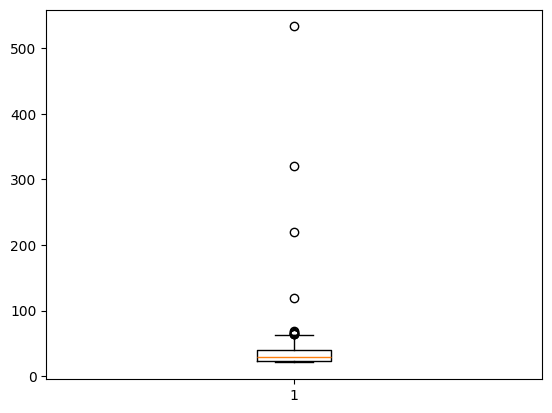

In [39]:
plt.boxplot(df["나이"])
plt.show()

In [40]:
### 박스의 상위 선(Max Outliner) 과 하위(Min Outliner) 선 기준으로 
# - 해당 선을 벗어난 원형 도형이 있는지 확인
# - 벗어난 값들을 이상치로 의심

df[df["나이"] > 70].drop

<bound method DataFrame.drop of         자전거번호              대여일시  대여소번호         대여소명  대여거치대              반납일시  \
4   SPB-07935  2019-11-05 12:29    512  뚝섬역 1번 출구 옆   11.0  2019-11-05 12:39   
30  SPB-20840   2019-11-28 8:32    419       홈플러스 앞    1.0   2019-11-28 8:35   
47  SPB-11637  2019-11-01 15:35    103   망원역 2번출구 앞    4.0  2019-11-01 15:41   
86  SPB-04854  2019-11-02 19:52    101  (구)합정동 주민센터    5.0  2019-11-02 21:01   

    반납대여소번호       반납대여소명  반납거치대       이용시간    이용거리   나이  
4         3         중랑센터    7.0  10.000000  1650.0  120  
30        5     상암센터 정비실    5.0   3.000000   280.0  533  
47      101  (구)합정동 주민센터    2.0   5.000000  1110.0  320  
86      101  (구)합정동 주민센터    2.0   7.585859  2300.0  220  >

In [42]:
# plt.bar_label(df["나이"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


# 이상치 데이터 계산하기
#### 계산 공식 
- min = q1 - 1.5 * iqr
- max = q3 + 1.5 * iqr
- iqr = q3 - iqr

In [53]:
import numpy as np

In [60]:
def get_max_min(list):
    q1, q3 = np.percentile(list, [25, 75])
    iqr = q3 - q1
    return q3 + 1.5 * iqr , q1 - 1.5 * iqr

In [64]:
get_max_min(df["나이"])

(np.float64(64.0), np.float64(0.0))

In [67]:
df[(df["나이"] <= min) | (df["나이"] > max)]

,자전거번호,대여일시,대여소번호,대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,나이
4,SPB-07935,2019-11-05 12:29,512,뚝섬역 1번 출구 옆,11.000000,2019-11-05 12:39,3,중랑센터,7.0,10.000000,1650.0,120
30,SPB-20840,2019-11-28 8:32,419,홈플러스 앞,1.000000,2019-11-28 8:35,5,상암센터 정비실,5.0,3.000000,280.0,533
47,SPB-11637,2019-11-01 15:35,103,망원역 2번출구 앞,4.000000,2019-11-01 15:41,101,(구)합정동 주민센터,2.0,5.000000,1110.0,320
86,SPB-04854,2019-11-02 19:52,101,(구)합정동 주민센터,5.000000,2019-11-02 21:01,101,(구)합정동 주민센터,2.0,7.585859,2300.0,220
123,SPB-22075,2019-11-03 21:50,152,마포구민체육센터 앞,7.585859,2019-11-03 21:57,101,(구)합정동 주민센터,1.0,6.000000,970.0,69
148,SPB-24758,2019-11-04 17:59,106,합정역 7번출구 앞,7.000000,2019-11-04 18:20,101,(구)합정동 주민센터,5.0,20.000000,1130.0,65
221,SPB-06127,2019-11-06 16:06,1925,동양미래대학교 정문 옆,6.000000,2019-11-06 17:09,101,(구)합정동 주민센터,4.0,62.000000,12610.0,66
294,SPB-08818,2019-11-08 23:13,108,서교동 사거리,2.000000,2019-11-08 23:24,101,(구)합정동 주민센터,2.0,10.000000,1360.0,65
362,SPB-24781,2019-11-12 10:45,101,(구)합정동 주민센터,3.000000,2019-11-12 11:50,101,(구)합정동 주민센터,4.0,64.000000,5600.0,65
363,SPB-24858,2019-11-12 11:41,113,홍대입구역 2번출구 앞,21.000000,2019-11-12 11:54,101,(구)합정동 주민센터,1.0,11.000000,2060.0,67


## 이상치 데이터 처리 방법
1. 해당 이상치 데이터를 살제할지 대체할지 경정
2. 삭제할 경우
   - 최대/최소 이상치 기준을 벗어나는 값들을 필터링해서 삭제
   - 또는, 필터링 결과의 False 값들만 별도 변수에 담아서 사용
3. 대체할 경우
   - 결측치 대체방법과 동일하게 처리
     -- 주로 이상치를 제외한 평균치를 이용하는 경우가 많음

In [95]:
mean = int(df[(df["나이"] >= min) & (df["나이"] <= max)]["나이"].mean())
df[(df["나이"] <= min) | (df["나이"] > max) == False]["나이"].mean()

np.float64(32.43170731707317)

In [99]:
df_tmp2 = df.copy()
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [100]:
out_tmp = (df["나이"] <= min) | (df["나이"] > max)
df[out_tmp]["나이"]
df_tmp2.loc[out_tmp, "나이"] = mean

In [101]:
df_tmp2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자전거번호    420 non-null    object 
 1   대여일시     420 non-null    object 
 2   대여소번호    420 non-null    int64  
 3   대여소명     420 non-null    object 
 4   대여거치대    420 non-null    float64
 5   반납일시     420 non-null    object 
 6   반납대여소번호  420 non-null    int64  
 7   반납대여소명   420 non-null    object 
 8   반납거치대    420 non-null    float64
 9   이용시간     420 non-null    float64
 10  이용거리     420 non-null    float64
 11  나이       420 non-null    int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 39.5+ KB


In [102]:
df_tmp2["나이"].value_counts()

나이
22    36
21    34
25    29
24    24
32    21
29    20
23    19
26    18
27    17
28    16
41    14
31    13
30    13
37    13
33    11
36    10
42    10
34     7
38     7
46     7
40     7
43     6
35     6
44     6
39     6
51     5
57     5
47     4
58     4
45     4
54     3
49     3
55     3
52     3
60     3
63     2
50     2
59     2
48     2
61     2
53     1
56     1
62     1
Name: count, dtype: int64